# Logistic Regression

## Data Description

- Attorney
    - 0 (yes), 1 (no)

- CLMAGE (Claimant's age)
- CLMSEX (Claimant's sex)
- SEATBELT (Whether the claimant was wearing seatbelt)
    - 0 (yes), 1 (no)
- CLMINSUR (Whether the driver of the claimant's vehicle was uninsured)
    - 0 (yes), 1 (no)
- LOSS (Claimant's total economic loss)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Datasets/claimants.csv')

In [3]:
df.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [4]:
df = df[['CASENUM', 'CLMSEX', 'CLMINSUR', 'SEATBELT', 'CLMAGE', 'LOSS', 'ATTORNEY']]

In [5]:
df.head()

,CASENUM,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,ATTORNEY
0,5,0.0,1.0,0.0,50.0,34.940,0
1,3,1.0,0.0,0.0,18.0,0.891,1
2,66,0.0,1.0,0.0,5.0,0.330,1
3,70,0.0,1.0,1.0,31.0,0.037,0
4,96,0.0,1.0,0.0,30.0,0.038,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CASENUM   1340 non-null   int64  
 1   CLMSEX    1328 non-null   float64
 2   CLMINSUR  1299 non-null   float64
 3   SEATBELT  1292 non-null   float64
 4   CLMAGE    1151 non-null   float64
 5   LOSS      1340 non-null   float64
 6   ATTORNEY  1340 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 73.4 KB


In [7]:
df.isna().sum()

CASENUM       0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
ATTORNEY      0
dtype: int64

In [8]:
df.describe()

,CASENUM,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,ATTORNEY
count,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000,1340.000000
mean,11202.001493,0.558735,0.907621,0.017028,28.414422,3.806307,0.488806
std,9512.750796,0.496725,0.289671,0.129425,20.304451,10.636903,0.500061
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4177.000000,0.000000,1.000000,0.000000,9.000000,0.400000,0.000000
50%,8756.500000,1.000000,1.000000,0.000000,30.000000,1.069500,0.000000
75%,15702.500000,1.000000,1.000000,0.000000,43.000000,3.781500,1.000000
max,34153.000000,1.000000,1.000000,1.000000,95.000000,173.604000,1.000000


/var/folders/y9/54zzfyhs7f72c0_0zfrb98yr0000gn/T/ipykernel_57328/1757118183.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ATTORNEY', y='CLMAGE', data = df, palette="hls")


<Axes: xlabel='ATTORNEY', ylabel='CLMAGE'>

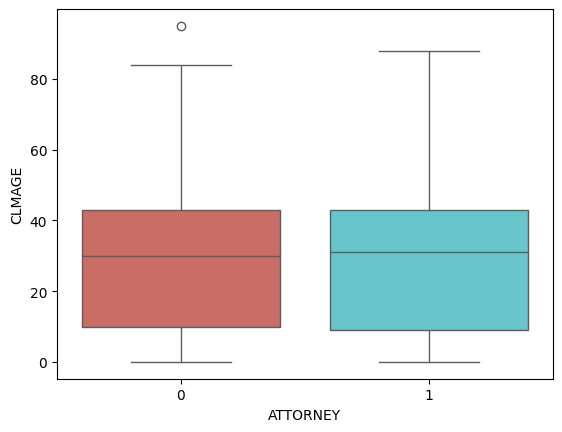

In [9]:
sns.boxplot(x='ATTORNEY', y='CLMAGE', data = df, palette="hls")

In [10]:
df = df.drop(['CASENUM'], axis=1)

In [11]:
df.head()

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,ATTORNEY
0,0.0,1.0,0.0,50.0,34.940,0
1,1.0,0.0,0.0,18.0,0.891,1
2,0.0,1.0,0.0,5.0,0.330,1
3,0.0,1.0,1.0,31.0,0.037,0
4,0.0,1.0,0.0,30.0,0.038,1


<Axes: xlabel='ATTORNEY', ylabel='percent'>

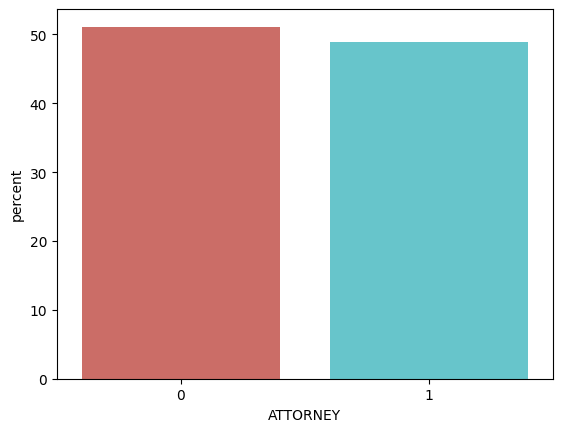

In [12]:
import warnings
warnings.filterwarnings('ignore')
sns.countplot(data=df, x="ATTORNEY", palette="hls", stat='percent')

In [13]:
pd.crosstab(df.ATTORNEY, df.CLMINSUR)

CLMINSUR,0.0,1.0
ATTORNEY,,
0,76,585
1,44,594


<Axes: xlabel='ATTORNEY'>

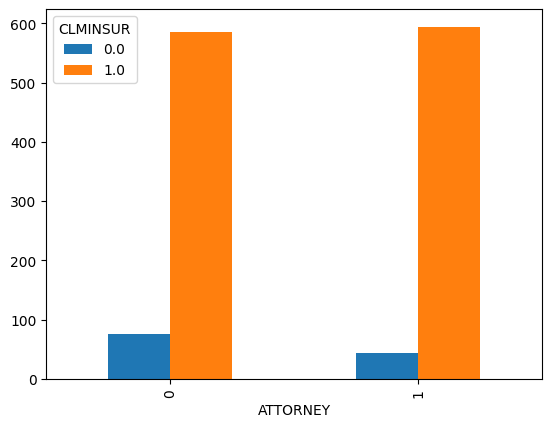

In [14]:
pd.crosstab(df.ATTORNEY, df.CLMINSUR).plot(kind = 'bar')

<Axes: xlabel='SEATBELT', ylabel='percent'>

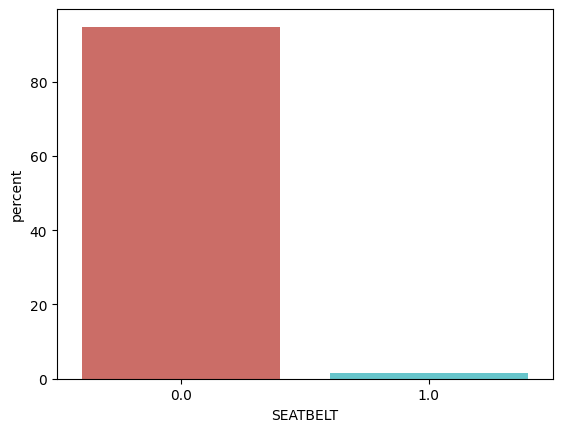

In [15]:
sns.countplot(data=df, x='SEATBELT', palette="hls", stat='percent')

<Axes: xlabel='CLMINSUR', ylabel='percent'>

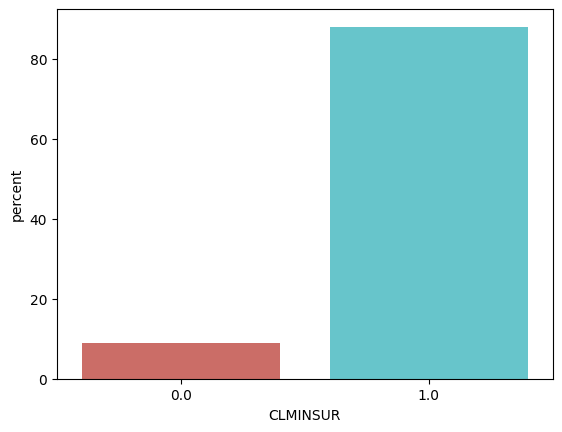

In [16]:
sns.countplot(data=df, x='CLMINSUR', palette="hls", stat='percent')

<Axes: xlabel='SEATBELT'>

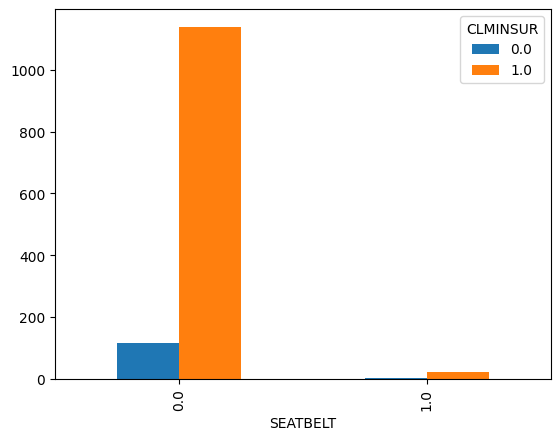

In [17]:
pd.crosstab(df.SEATBELT, df.CLMINSUR).plot(kind='bar')

<Axes: xlabel='CLMSEX', ylabel='percent'>

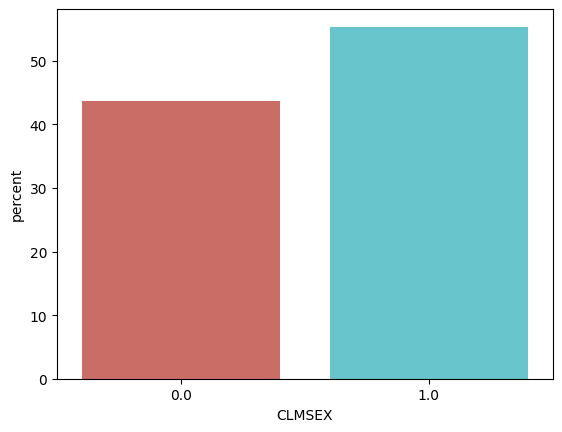

In [18]:
sns.countplot(data=df, x='CLMSEX', palette='hls', stat='percent')

<Axes: xlabel='CLMSEX'>

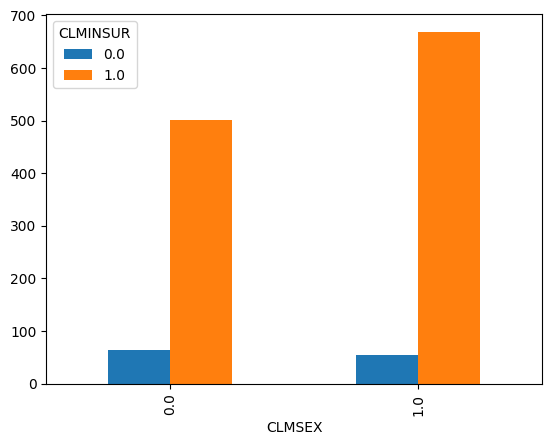

In [19]:
pd.crosstab(df.CLMSEX, df.CLMINSUR).plot(kind='bar')

In [20]:
df['CLMSEX'].mode()

0    1.0
Name: CLMSEX, dtype: float64

In [21]:
df['CLMINSUR'].mode()

0    1.0
Name: CLMINSUR, dtype: float64

In [22]:
df['SEATBELT'].mode()

0    0.0
Name: SEATBELT, dtype: float64

In [23]:
df.head()

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,ATTORNEY
0,0.0,1.0,0.0,50.0,34.940,0
1,1.0,0.0,0.0,18.0,0.891,1
2,0.0,1.0,0.0,5.0,0.330,1
3,0.0,1.0,1.0,31.0,0.037,0
4,0.0,1.0,0.0,30.0,0.038,1


In [24]:
# Fill NaN values with mode of the categorical column
df['CLMSEX'].fillna(1.0, inplace=True)
df['CLMINSUR'].fillna(1.0, inplace=True)
df['SEATBELT'].fillna(0.0, inplace=True)

In [25]:
df.isna().sum()

CLMSEX        0
CLMINSUR      0
SEATBELT      0
CLMAGE      189
LOSS          0
ATTORNEY      0
dtype: int64

In [26]:
df.CLMAGE.mean()

np.float64(28.414422241529106)

In [27]:
df.CLMAGE.fillna(28.4, inplace = True)

In [28]:
df.isna().sum()

CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
ATTORNEY    0
dtype: int64

In [29]:
# Model Building
# Already imported LogisticRegression from sklearn.linear_model
df.shape

(1340, 6)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics, preprocessing
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [31]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
# Fitting Logistic Regression model on X and y
classifier = LogisticRegression()
classifier.fit(X,y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [32]:
# Finding Coefficients (B1, B2, B3, B4, B5)
classifier.coef_

array([[ 0.3170423 ,  0.50547152, -0.52931493,  0.00660317, -0.32245695]])

In [33]:
# Probability Values
classifier.predict_proba(X)

array([[9.99974095e-01, 2.59046690e-05],
       [4.95364018e-01, 5.04635982e-01],
       [4.25061112e-01, 5.74938888e-01],
       ...,
       [2.85351617e-01, 7.14648383e-01],
       [6.86675800e-01, 3.13324200e-01],
       [3.38785126e-01, 6.61214874e-01]], shape=(1340, 2))

In [34]:
y_pred = classifier.predict(X)
df['y_pred'] = y_pred

In [35]:
df

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,ATTORNEY,y_pred
0,0.0,1.0,0.0,50.0,34.940,0,0
1,1.0,0.0,0.0,18.0,0.891,1,1
2,0.0,1.0,0.0,5.0,0.330,1,1
3,0.0,1.0,1.0,31.0,0.037,0,1
4,0.0,1.0,0.0,30.0,0.038,1,1
...,...,...,...,...,...,...,...
1335,0.0,1.0,0.0,28.4,0.576,1,1
1336,1.0,1.0,0.0,46.0,3.705,0,0
1337,1.0,1.0,0.0,39.0,0.099,1,1
1338,1.0,0.0,0.0,8.0,3.177,0,0


In [36]:
# Combining the probability values
y_prob = pd.DataFrame(classifier.predict_proba(X))
new_df = pd.concat([df, y_prob], axis=1)
new_df

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,ATTORNEY,y_pred,0,1
0,0.0,1.0,0.0,50.0,34.940,0,0,0.999974,0.000026
1,1.0,0.0,0.0,18.0,0.891,1,1,0.495364,0.504636
2,0.0,1.0,0.0,5.0,0.330,1,1,0.425061,0.574939
3,0.0,1.0,1.0,31.0,0.037,0,1,0.490282,0.509718
4,0.0,1.0,0.0,30.0,0.038,1,1,0.363254,0.636746
...,...,...,...,...,...,...,...,...,...
1335,0.0,1.0,0.0,28.4,0.576,1,1,0.406797,0.593203
1336,1.0,1.0,0.0,46.0,3.705,0,0,0.549460,0.450540
1337,1.0,1.0,0.0,39.0,0.099,1,1,0.285352,0.714648
1338,1.0,0.0,0.0,8.0,3.177,0,0,0.686676,0.313324


In [37]:
# Comparing Predicted Values with Actual Values
# Already imported confusion_matrix from sklearn.metrics
confusion_m = confusion_matrix(y, y_pred)
confusion_m

array([[435, 250],
       [147, 508]])

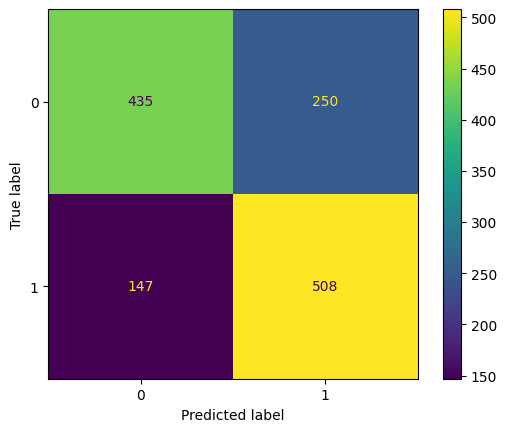

In [38]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_m)
disp.plot()

In [39]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.64      0.69       685
           1       0.67      0.78      0.72       655

    accuracy                           0.70      1340
   macro avg       0.71      0.71      0.70      1340
weighted avg       0.71      0.70      0.70      1340



f1-score for 0 it is 0.69 and for 1 it is 0.72.

Model is having more accuracy predicting 1's than 0's

In [40]:
from sklearn.metrics import roc_auc_score, roc_curve
logit_roc_score = roc_auc_score(y, y_pred)
logit_roc_score

0.7053045077171672

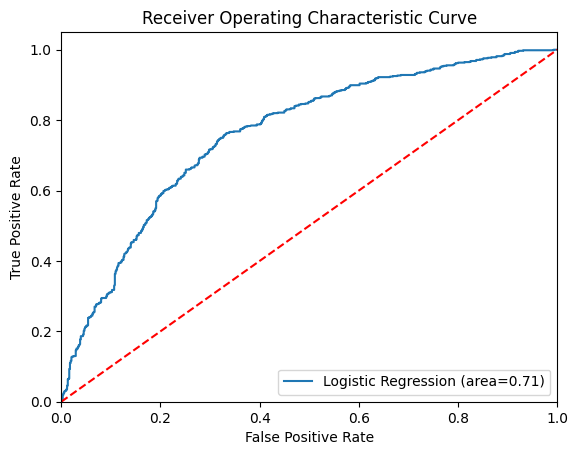

In [41]:
fpr, tpr, thresholds = roc_curve(y, classifier.predict_proba(X)[:, 1])
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% logit_roc_score)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic Curve")
plt.legend(loc = 'lower right')
plt.show()